<h1><center>Kernel SVM</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(10)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

## Non-Linear SVM Classification
  * With SVM, we can apply Kernel trick, the trick makes it possible to get the same result with out adding many polynomial features. This will solve the problem of combinatorial explosion of the number of features.

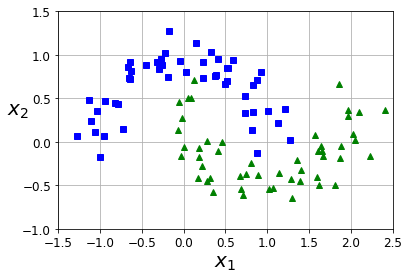

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [3]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [4]:
from sklearn.svm import SVC
poly_svc_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svc_clf", SVC(kernel='poly'))
    ])

param_grid_svc =  {
        "svc_clf__degree": np.arange(1, 10),
        "svc_clf__C": np.arange(1, 10),
        "svc_clf__coef0": np.arange(1, 10)
    }

##### coef0 : The Hyperparameter "coef0" can be used to reduce "Overfitting" of a high degree polynomial. This is kind of regularization (shrinkage) parameter in Linear Models.

In [5]:
poly_grid_search_svc = GridSearchCV(poly_svc_clf, param_grid_svc, cv=10)
poly_grid_search_svc.fit(X, y)
print("Best params : ", poly_grid_search_svc.best_params_)
print("Best estimator : ", poly_grid_search_svc.best_estimator_)

Best params :  {'svc_clf__C': 1, 'svc_clf__coef0': 9, 'svc_clf__degree': 4}
Best estimator :  Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc_clf',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=9, decision_function_shape='ovr', degree=4,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


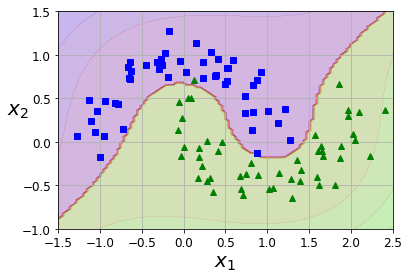

In [7]:
plot_predictions(poly_grid_search_svc.best_estimator_, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<span style="color:red">Reference: Hands-On Machine Learning with Scikit-Learn, Keras and Tensor Flow by  Aurelien Geron</span>